# CNN on Handwritten Digits with Keras

In [10]:
import tensorflow as tf
print(tf.__version__)
# !python --version

2.12.0


In [11]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D
import tensorflow_datasets as tfds
# %matplotlib inline

## Importing the data:

In [12]:
# Load MNIST dataset from TensorFlow Datasets

image_train, label_train = tfds.as_numpy(tfds.load(
    'mnist',
    split='train',
    batch_size=-1,
    as_supervised=True,
))

image_test, label_test = tfds.as_numpy(tfds.load(
    'mnist',
    split='test',
    batch_size=-1,
    as_supervised=True,
))

In [13]:
image_train.shape

(60000, 28, 28, 1)

In [14]:
label_train.shape

(60000,)

In [15]:
# Reshape the training data to represent one-channel image input(grayscale)
img_rows, img_cols = image_train[0].shape[0], image_train[0].shape[1]
X_train = image_train.reshape(image_train.shape[0], img_rows, img_cols, 1)
X_test = image_test.reshape(image_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [16]:
image_train.shape

(60000, 28, 28, 1)

In [17]:
image_test.shape

(10000, 28, 28, 1)

In [18]:
#Normalize the input data:
image_train_std = image_train.astype('float32')/255.
image_test_std = image_test.astype('float32')/255.

In [19]:
#One-hot encode the labels:
n_classes = len(set(label_train))
y_train = np_utils.to_categorical(label_train, n_classes)
y_test = np_utils.to_categorical(label_test, n_classes)

## CNN architecture:

In [20]:
help(Conv2D)

Help on class Conv2D in module tensorflow.python.keras.layers.convolutional:

class Conv2D(Conv)
 |  Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), groups=1, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  2D convolution layer (e.g. spatial convolution over images).
 |  
 |  This layer creates a convolution kernel that is convolved
 |  with the layer input to produce a tensor of
 |  outputs. If `use_bias` is True,
 |  a bias vector is created and added to the outputs. Finally, if
 |  `activation` is not `None`, it is applied to the outputs as well.
 |  
 |  When using this layer as the first layer in a model,
 |  provide the keyword argument `input_shape`
 |  (tuple of integers or `None`, does not include the sample axis),
 |  e.g. `input_shape=(12

In [21]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

## Compiling the model:

In [23]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
#hyperparameters
batch_size = 128
n_epochs = 5

## Train the model:

In [27]:
model.fit(image_train, label_train, batch_size=batch_size, epochs=n_epochs)

Epoch 1/5
469/469 [==============================] - 378s 802ms/step - loss: 0.8146 - accuracy: 0.0998
Epoch 2/5
469/469 [==============================] - 383s 816ms/step - loss: 0.1166 - accuracy: 0.0991
Epoch 3/5
469/469 [==============================] - 361s 770ms/step - loss: 0.0927 - accuracy: 0.0988
Epoch 4/5
469/469 [==============================] - 371s 792ms/step - loss: 0.0787 - accuracy: 0.0992
Epoch 5/5
469/469 [==============================] - 365s 779ms/step - loss: 0.0681 - accuracy: 0.0990


In [28]:
#Show the results on the test set:
#verbose: Integer. 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2024-02-24 00:25:14.747879: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: logits and labels must have the same first dimension, got logits shape [32,10] and labels shape [320]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
      app.start()
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start
      self.io_loop.start()
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 607, in run_forever
      self._run_once()
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once
      handle._run()
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 542, in dispatch_queue
      await self.process_one()
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 531, in process_one
      await dispatch(*args)
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell
      await result
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 359, in execute_request
      await super().execute_request(stream, ident, parent)
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 775, in execute_request
      reply_content = await reply_content
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 446, in do_execute
      res = shell.run_cell(
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell
      result = self._run_cell(
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell
      result = runner(coro)
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/vs/jqzkvm7s5yv02zzb44xn5ysc0000gn/T/ipykernel_25403/733289214.py", line 3, in <module>
      score = model.evaluate(X_test, y_test, verbose=1)
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/tensorflow/python/keras/engine/training.py", line 1497, in evaluate
      tmp_logs = self.test_function(iterator)
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/tensorflow/python/keras/engine/training.py", line 1327, in test_function
      return step_function(self, iterator)
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/tensorflow/python/keras/engine/training.py", line 1318, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/tensorflow/python/keras/engine/training.py", line 1311, in run_step
      outputs = model.test_step(data)
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/tensorflow/python/keras/engine/training.py", line 1272, in test_step
      self.compiled_loss(
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/tensorflow/python/keras/engine/compile_utils.py", line 204, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/tensorflow/python/keras/losses.py", line 155, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/tensorflow/python/keras/losses.py", line 259, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/tensorflow/python/keras/losses.py", line 1752, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/tensorflow/python/keras/backend.py", line 4977, in sparse_categorical_crossentropy
      res = nn.sparse_softmax_cross_entropy_with_logits_v2(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [32,10] and labels shape [320]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_test_function_6426]

## Showing predictions:

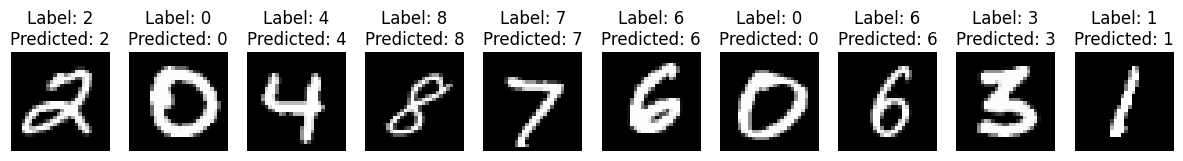

In [29]:
preds = model.predict(X_test)
n = 10
plt.figure(figsize=(15,15))
for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.title("Label: {}\nPredicted: {}".format(np.argmax(y_test[i]), np.argmax(preds[i])))
    plt.axis('off')
plt.show()          

## Plotting misclassified images:

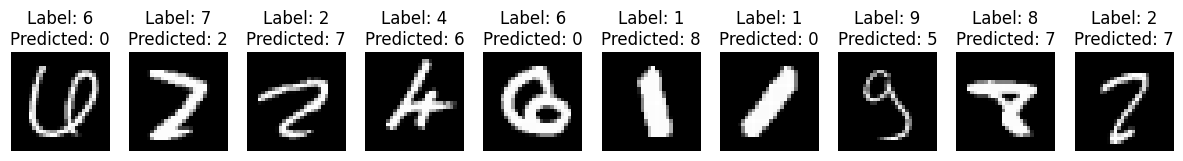

In [30]:
plt.figure(figsize=(15,15))
misc = 0
for i in range(len(y_test)):
    if(misc==10):
        break
    label = np.argmax(y_test[i])
    pred = np.argmax(preds[i])
    if label != pred:
        plt.subplot(1, n, misc + 1)
        plt.imshow(X_test[i, :, :, 0], cmap='gray')
        plt.title("Label: {}\nPredicted: {}".format(label, pred))
        plt.axis('off')
        misc+=1
plt.show()        